<a href="https://colab.research.google.com/github/Bagussandro/Project1.rekaya.web/blob/main/Fuzzy_G_211_20_0024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install scikit-fuzzy --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 16.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894073 sha256=748c6bacbcea1e0a7ea1d62a33f0d070d85ca8561a3a0a71e6410477ef2cc96f
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


In [4]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from google.colab import files
uploaded = files.upload()
import skfuzzy

Saving UCI_Credit_Card.csv to UCI_Credit_Card (1).csv


In [5]:
base = pd.read_csv('UCI_Credit_Card.csv', header = 0)
base.shape

(30000, 25)

In [6]:
base['BILL_TOTAL'] = base['BILL_AMT1'] +base['BILL_AMT2'] +base['BILL_AMT3'] +base['BILL_AMT4'] +base['BILL_AMT5'] +base['BILL_AMT6']

In [7]:
base.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month,BILL_TOTAL
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,7704.0
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,17077.0
2,3,90000.0,2,2,2,34,0,0,0,0,...,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,101653.0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,231334.0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,109339.0


In [8]:
X = base.iloc[:,[1,25]].values

In [9]:
X.shape

(30000, 2)

In [10]:
X = base.iloc[:,[1,25]].values

In [11]:
X.shape

(30000, 2)

In [12]:
X.T.shape

(2, 30000)

In [13]:
r = skfuzzy.cmeans(data = X.T, c = 3, m=2, error=0.005, maxiter=1000, init=None)

In [14]:
r

(array([[ 140102.33503446,   80565.81360806],
        [ 175796.35951917,  491929.31987922],
        [ 308715.70292198, 1332275.16622643]]),
 array([[0.91996097, 0.97855709, 0.98001069, ..., 0.93563756, 0.59885839,
         0.71957453],
        [0.07016118, 0.01898458, 0.0181357 , ..., 0.05751289, 0.38187194,
         0.26316099],
        [0.00987785, 0.00245833, 0.00185362, ..., 0.00684955, 0.01926967,
         0.01726447]]),
 array([[0.01351262, 0.41561521, 0.10442342, ..., 0.3384929 , 0.26607078,
         0.29870401],
        [0.49818708, 0.47342983, 0.68788885, ..., 0.35738864, 0.2308301 ,
         0.34109991],
        [0.48830029, 0.11095496, 0.20768772, ..., 0.30411846, 0.50309912,
         0.36019608]]),
 array([[ 140475.67320709,   66595.29508303,   54359.11520466, ...,
          110561.86198749,  195512.4089571 ,  175245.48974252],
        [ 508671.47163131,  478119.18956498,  399595.57200401, ...,
          445940.15467714,  244837.26793592,  289783.71953152],
        [1355671

In [15]:
previsoes_porcentagem = r[1]

In [16]:
previsoes_porcentagem.shape

(3, 30000)

In [17]:
previsoes_porcentagem

array([[0.91996097, 0.97855709, 0.98001069, ..., 0.93563756, 0.59885839,
        0.71957453],
       [0.07016118, 0.01898458, 0.0181357 , ..., 0.05751289, 0.38187194,
        0.26316099],
       [0.00987785, 0.00245833, 0.00185362, ..., 0.00684955, 0.01926967,
        0.01726447]])

In [18]:
previsoes_porcentagem[0][0]

0.9199609656303362

In [19]:
previsoes_porcentagem[1][0]

0.07016117957214893

In [20]:
previsoes_porcentagem[2][0]

0.009877854797514865

In [21]:
previsoes_porcentagem[0][0] + previsoes_porcentagem[1][0] + previsoes_porcentagem[2][0]

1.0

In [22]:
previsoes = previsoes_porcentagem.argmax(axis=0)

In [23]:
previsoes

array([0, 0, 0, ..., 0, 0, 0])

In [24]:
previsoes[5000]

0

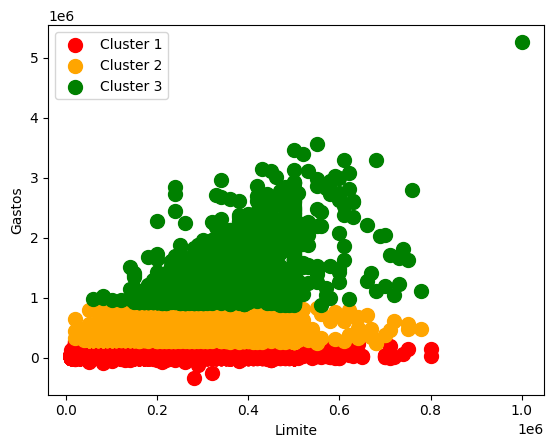

In [25]:
plt.scatter(X[previsoes ==0, 0], X[previsoes ==0, 1], s = 100, c= 'red', label = 'Cluster 1')
plt.scatter(X[previsoes ==1, 0], X[previsoes ==1, 1], s = 100, c= 'orange', label = 'Cluster 2')
plt.scatter(X[previsoes ==2, 0], X[previsoes ==2, 1], s = 100, c= 'green', label = 'Cluster 3')
plt.xlabel('Limite')
plt.ylabel('Gastos')
plt.legend();